# Information Theory

https://en.wikipedia.org/wiki/Information_theory  
https://www.basicknowledge101.com/pdf/km/Entropy%20(information%20theory).pdf  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
yf.pdr_override()

In [2]:

symbol = 'AMD'

In [3]:
df = yf.download(symbol)

[*********************100%***********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-31,60.750000,61.860001,59.529999,60.060001,60.060001,73274100
2022-11-01,61.490002,61.990002,59.430000,59.660000,59.660000,83806700
2022-11-02,63.000000,63.930000,58.570000,58.630001,58.630001,142669400
2022-11-03,58.110001,62.279999,58.029999,60.110001,60.110001,95279900
2022-11-04,62.500000,63.000000,60.540001,61.684399,61.684399,18608280


In [6]:
x = np.array(df['Adj Close']).squeeze()

In [7]:
import collections

outcomes = [item for item, count in collections.Counter(x).items() if count > 1]

In [8]:
outcomes = np.round(outcomes, 2)
outcomes

array([  3.15,   3.03,   3.04, ..., 132.  , 113.83,  86.99])

In [9]:
outcome_probabilities = [0.50, 0.50, 0.50, 0.50]

In [10]:
H = outcomes

for p in outcome_probabilities:
    H += (p*np.log2(p))

H = -H

print(H)

[  -1.15   -1.03   -1.04 ... -130.   -111.83  -84.99]


In [11]:
data = {'Repeat Adj Close':outcomes,
        'Entropy':H}

In [12]:
IT_df = pd.DataFrame(data)
IT_df

,Repeat Adj Close,Entropy
0,1.15,-1.15
1,1.03,-1.03
2,1.04,-1.04
3,1.01,-1.01
4,0.92,-0.92
...,...,...
1630,100.95,-100.95
1631,104.15,-104.15
1632,130.00,-130.00
1633,111.83,-111.83


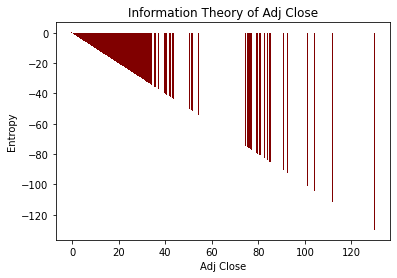

In [13]:
plt.bar(IT_df['Repeat Adj Close'], IT_df['Entropy'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Adj Close")
plt.ylabel("Entropy")
plt.title("Information Theory of Adj Close")
plt.show()

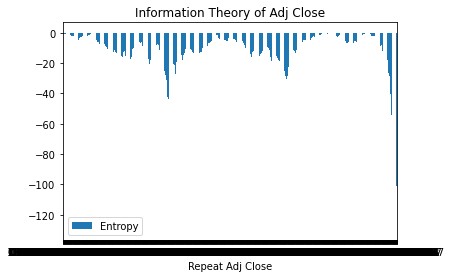

In [14]:
ax = IT_df.plot.bar(x='Repeat Adj Close', y='Entropy', rot=0, title = "Information Theory of Adj Close")